# **Analytical Solutions of Ordinary Differential Equations**

## ***Learning Objectives***


*   Draw compartment diagrams that integrate system inputs and outputs
*   Write a set of ordinary differential equations based on compartment diagrams
*   Solve simple ordinary differential equations analytically
*   Compare various systems based on. key equation parameter, such as steady-state solution, step response, and response time

This chapter and the next two chapters focus on the workhorse of computational systems biology: sets of ordinary differential equations (ODEs) based on **conservation of mass** and **mass action kinetics.**  Most models that are published in systems biology papers consist of a set of ODEs.

Steven Strogatz, an outstanding mathematician and teacher at Cornell University, says that every modeler should have three tools for solving sets of ODEs: analytical, graphical, and numerical solving techniques.  We’re going to investigate all of these tools in the context of our simple circuit.  First, we’ll solve the ODEs analytically and figure out what they’re telling us about what feedback does and why it might be advantageous for a cell to use it.

##**Section 3.1:  Synthetic Biological Circuits**

We can also begin to look at “real” circuits.  The quotes around “real” are there because the circuits exist, but not naturally.  Instead, they were assembled using the techniques of molecular biology, and are called synthetic circuits.  Figure 3.1 shows two synthetic gene transcription circuits, one lacking feedback and the other with feedback.  The transcription units in both cases involve an activator to control gene expression and a reporter to indicate when transcription is active.  The activator, anhydrotetracycline (aTc), binds a negative regulatory protein called TetR and prevents it from binding the promoter region of the gene.  The “double negative” of aTc inhibiting TetR repression leads to a net activation of gene expression when the transcription unit is in the presence of aTc.

![Figure 3.1](https://drive.google.com/uc?export=view&id=1f0ZuzpT93spZsTjJQJaOnhDgHtDSEmtX)

> **Figure 3.1.  Synthetic transcription circuits without (A) or with (B) negative autoregulation.**  Expression of green fluorescent protein (GFP) is negatively regulated by binding of the repressor TetR, which is either encoded at another locus (A) or fused to the GFP coding sequence for autoregulation (B).  TetR is itself inhibited by binding of the activator anhydrotetracycline (aTc), a chemical that can be added to the medium by the investigator.  Reprinted from Rosenfeld, N., Elowitz, M.B., Alon, U.  Negative autoregulation speeds the response times of transcription networks.  *Journal of Molecular Biology.*  2002.  **323**(5): 785-93, with permission from Elsevier.

The reporter protein, encoded by the gene, is a fluorescent protein from jellyfish called GFP (for green fluorescent protein).  When the gene is transcribed and translated, these proteins fluoresce green, and this fluorescence can be detected and recorded.

The transcription unit in Figure 3.1A does not undergo negative autoregulation; it is simply gfp with a binding site for TetR in the promoter region.  TetR is produced constitutively by another gene in this strain of E. coli, and so the activity of the gene depends on whether sufficient aTc is present to prevent TetR from binding the gfp promoter.  If aTc is present, gene expression occurs and we can detect fluorescence, but otherwise there is neither expression nor fluorescence.

In contrast to the simple transcription unit of Figure 3.1A, the circuit drawn in Figure 3.1B includes autoregulatory feedback.  In this case the gene encodes a **fusion protein**: the gfp gene follows directly behind the tetR gene, so they are transcribed and translated as a single protein.  Here E. coli does not produce TetR constitutively (the native tetR is absent from this strain), and so TetR is only present when gene expression of the synthetic circuit has occurred.  The absence of aTc prevents expression of the fusion gene just as before.  The presence of aTc, however, induces expression of the circuit and greatly increases the concentration of TetR::GFP (the :: indicates the fusion protein).  TetR binds very tightly to aTc, and so when enough TetR molecules are present, all aTc molecules are bound and effectively inactivated, allowing TetR to repress further gene expression.

These two transcription units were constructed to experimentally investigate the differences between a system with feedback and one without it.  We are going to address the same question here using a set of ODEs that describe the system.


## **Section 3.2: From Compartment Models to ODEs**

I will begin by giving you a very brief introduction to ODEs using a rain gutter analogy.  When I was young I once kept measuring cups outside in the rain so that I could determine how much rainfall Palo Alto was getting in an hour on rainy days.  Let’s pretend that I wanted to use that rainfall data and other information to determine what was happening to the water in the rain gutter on my house.

![Figure 3.3](https://drive.google.com/uc?export=view&id=1LzD0pVaRi2MQdcEXgnPUuO4kRYpZpyoH)


> **Figure 3.2.  Conceptualizing ODEs with a rain gutter analogy.**  (A) During a rainstorm, water enters the gutter at rate Rain, flows out of the drain pipe at rate Drain, or builds up in the gutter to an amount GW.  (B) The compartment diagram for the analogy indicates that water only enters the gutter from the rain and only exits the gutter from the drain; the diagram also captures the dependence on time of these processes.

Figure 3.2A depicts a house in the rain, complete with rain gutter and drain pipe.  As the rain pours into the gutter, water can either flow out of the drain pipe or build up in the gutter.  We can indicate this conceptually by using a compartment model, as illustrated with a compartment diagram in Figure 3.2B.  Here, the rate of rainfall (Rain) and the rate of drainage (Drain) are both considered as functions of time, while $GW$ indicates the amount of water in the rain gutter.

Let’s assume that I can get a decent estimate of the rain and drain rates with my measuring cups and a stopwatch, and I want to see what happens to the amount of gutter water over time.  I assume that water is not entering the gutter from anywhere but the rain, and not leaving from anywhere except the drain.  If I know the level of gutter water at a certain time $t$, and want to predict the level after a short time period $Δt$, I can write the following equation:

> <h3> $GW(t + \Delta t) = GW(t) + \text{Rain}(t) \cdot \Delta t - \text{Drain}(t) \cdot \Delta t$

*(Equation 3.1)*

In other words, the amount of gutter water at the later time is simply equal to how much water was in the gutter before, plus whatever fell in, minus whatever poured out.  We calculate the amount of water that fell in by multiplying our gutter rainfall rate, which would be some amount over time, by the time interval $Δt$.  Similarly, we multiply the drain rate by the time interval to determine the amount of water that poured out.

If we rearrange Equation 3.1 by subtracting $GW(t)$ from both sides and dividing by $Δ$, we obtain:

> <h3>$\frac{GW (t + Δt) − GW (t)}{Δt} = \text{Rain}(t) − \text{Drain}(t)$

*(Equation 3.2)*

If we then take the limit of both sides of this equation as $Δt \rightarrow 0$, we obtain an ODE:

> <h3>$\frac{dGW}{dt} = \text{Rain}(t) - \text{Drain}(t)$

*(Equation 3.3)*

where $dGW/dt$ is the derivative of the amount of gutter water with respect to time.  If I have a good enough understanding of how Rain and Drain depend on time or on $GW$, I can make some interesting predictions.  For example, I can predict the amount of water in the gutter at future times.  I can also predict the effect of perturbations – such as clogging the drain – on the time it takes for the gutter to overflow.

And there we have it – from a grade-school science fair project to an ODE!  Systems of ODEs have been used for all kinds of applications.  For example, ODEs not much more complicated than our rain gutter example have been used to model the spread of HIV from cell to cell and from person to person, leading to recommendations that impacted health policy.  They have been used to model waste removal in patients undergoing dialysis and to describe the conversion of sugars to biofuel in microorganisms.  Right now we’re going to use them to describe our transcription units from Figure 3.1 in an effort to understand the importance of autoregulation.

In all of these cases, the general form of the ODEs looks like a generalized form of Equation 3.3 with more inputs and/or outputs:


> <h3> $\frac{dx}{dt} = \sum \text{Rates}_{\text{production}} - \sum \text{Rates}_{\text{loss}}$

*(Equation 3.4)*

In other words, the change in amount or concentration of some entity $x$ over time is equal to the sum of the rates of production of $x$, minus the rates that lead to loss of $x$.

Take a moment to consider what we’ve just done here.  We started with a very cartoon-like picture of a system (Figure 3.2A), moved first to a compartment model and diagram (Figure 3.2B), and then continued to a mathematical equation (Equation 3.3) that we can use to analyze, interpret, and even predict the behavior of the system.

If you can learn how to encode a biological network schematic into a set of equations like this, you are well on your way to making substantial, independent contributions to biological research!  If your educational background is in biology instead of engineering, you may wonder whether you’ll be able to catch up with the engineers.  Good news – in many ways, biologists are better suited for this part of model construction because it requires strong knowledge and intuition about the system (in fact, I was once told this by the head of systems biology at a large pharmaceutical company!).  If you have that knowledge or intuition, drawing the block diagrams and writing out (and even solving, as you’ll see) the ODEs become fairly straightforward.

Let’s practice by writing out the equations for our feedback system with a few changes from Chapter 2.  First, let’s assume that the activator is always present – as you already learned, solutions without activator are somewhat trivial.  Second, we will explicitly include loss of the mRNA and protein in this chapter.  You’ll remember that loss can occur by degradation of the molecule or by dilution as cells grow and divide.


## <u>**Practice Problem 3.1**</u>

***Question:*** *Given the system in Figure 3.3, draw a compartment model for the mRNA and protein concentrations.  Write the equations that describe how these concentrations change over time.*

![Figure 3.3](https://drive.google.com/uc?export=view&id=1sasAmaqx26qQsgGiYFoxi8Jwnhn-V0m0)

> **Figure 3.3.  Slightly altering our feedback system for Practice Problem 3.1.**  This updated schematic includes the loss of mRNA and protein molecules as well as their production by transcription and translation, respectively.  As in the original circuit, the protein product of this updated circuit represses its own transcription.

**Solution:** The two compartment diagrams appear in Figure 3.4.  Notice that there are two compartments now, and that each compartment has two possible ways for either mRNA or protein to be lost.

![Figure 3.4](https://drive.google.com/uc?export=view&id=1muWv1tW276RqgL-FQ3iuBU16TKl6iUK_)

> **Figure 3.4.  Compartment diagrams illustrating the mechanisms for creation and loss of mRNA (left) and protein (right) in our updated autoregulatory circuit.**  All of these processes are associated with specific rates.

Using these diagrams, it is relatively straightforward to write the two ODEs for this system:

> <h3> $\frac{d[mRNA]}{dt} = Rate_{transcription} - Rate_{decay} - Rate_{dilution}$

*(Equation 3.5)*

> <h3> $\frac{d[Protein]}{dt} = Rate_{translation} - Rate_{decay} - Rate_{dilution}$

*(Equation 3.6)*

## **Section 3.3.: Specifying and Simplifying ODEs with Assumptions**

Now we’ve accomplished the first step: writing the equations.  However, these rate terms are not very specific.  How do we add detail to these rate expressions?  There are several assumptions we can make about a given rate term.  The most simple assumption would be that a given rate is zero or very small with respect to other terms in the equation.  Removing or simplifying terms where appropriate can make equations much easier to solve.

For example, you learned in Chapter 2 that protein loss by decay often takes much longer (occurs at a much slower rate) than loss by dilution.  As a result, the decay rate will be substantially lower than the dilution rate, and we could write that $Rate_{decay} + Rate_{dilution} ≈ Rate_{dilution}$, or $Rate_{decay} ≈ 0$.  In contrast, mRNA loss by decay is typically faster than the dilution rate, and so we make the opposite assumption: $Rate_{decay} + Rate_{dilution} ≈ Rate_{decay}$, or $Rate_{dilution} ≈ 0$.

A second, related assumption is that a rate for a given system does not change significantly under the conditions that interest us.  For example, certain genes are known as **housekeeping genes** because their protein products are so critical to cellular function that they are essentially always transcribed at a nearly constant rate.  These genes are often used as controls in experiments monitoring gene or protein expression.  For housekeeping genes, then, we would replace $Rate_{transcription}$ with a constant, such as $k_{trs}$, with units of concentration over time.  This constant is a parameter of the model, which needs to be assigned a value to solve numerically. Ideally, we would measure $k_{trs}$ for our circuit; if that wasn’t possible, we would need to estimate it.

Another common assumption is that the process follows mass action kinetics: that the reaction rate is proportional to the product of the reactant concentrations.  For example, mRNA decay depends on a reaction between the mRNA molecule and a class of enzymes called ribonucleases (RNases).  Assuming that the rate follows mass action kinetics, the rate of mRNA decay at a given moment in time is proportional to the product of the mRNA and RNase concentrations at that time.  We then write:


> <h3>$Rate_{decay} \propto [mRNA][RNase]$

*(Equation 3.7)*

Often this kind of equation is simplified by assuming that certain reactants such as RNase are present at constant levels.  If we simplify Equation 3.7 in this way and define a kinetic constant to describe the proportionality between the mRNA concentration and the transcription rate, we obtain:

> <h3> $Rate_{decay} = k_{mdec}[mRNA]$

*(Equation 3.8)*

In other words, the more mRNA that exists, the more that will be degraded in a given interval of time.  Moreover, the units of $k_{mdec}$, 1/time, are different from the translation constant $k_{trs}$, which has units of concentration over time.  Looking at Equation 3.8, you may be asking, “wait a minute, where did the RNase concentration go?”  The answer is that the RNase concentration is bundled as part of $k_{mdec}$ (see the explanation for Equation 3.7).
  
The three assumptions described above – rate of zero, constant rate, and mass action kinetic rate – are by far the most common starting points for building an ODE-based model of a biological system.  You will see later that there are other ways to describe rates as well, but for now, simplifying the equation for protein concentration using these three assumptions is pretty straightforward.  We’ll use the mass action kinetics assumption for all three terms on the right-hand side of the equation:


> <h3>$\frac{d[Protein]}{dt} = k_{trl}[mRNA]− k_{pdec} [Protein]− k_{pdil}[Protein]$

*(Equation 3.9)*

Protein decay and dilution are simply proportional to the protein concentration, and because translation creates protein from mRNA, we assume that the translation rate $k_{trl}$ is proportional to the mRNA concentration.  Just as we assumed that the RNase concentration didn’t change much over time to obtain Equation 3.8 from Equation 3.7, we are assuming that the concentrations of ribosomes and protease are relatively stable and can therefore be bundled into our kinetic constants.  Since both the decay and dilution terms depend on the protein concentration, we can also combine these terms into one general “loss” term:

> <h3> $\frac{d[Protein]}{dt} = k_{trl}[mRNA] - k_{ploss}[Protein]$

*(Equation 3.10)*

Our mRNA equation is somewhat harder to write as a result of our system’s
autorepression. We need to come up with an expression for the rate of mRNA production that reflects the idea that less mRNA will be produced if there is a lot of protein available. We don’t know exactly what this function looks like yet, but we want to assert that protein concentration is the key player. For now, let’s just say that the rate of transcription is a function of the protein concentration, $fxn_{trs}([Protein])$. We can then
rewrite Equation 3.5 as:

> <h3> $\frac{d[mRNA]}{dt} = fxn_{trs}([Protein])− k_{mloss}[mRNA]$

*(Equation 3.11)*

Except for that as-yet unknown function, Equations 3.10 and 3.11 are pretty well
specified.

## **Section 3.4: The Steady-State Assumption**

Can we reduce this set of two equations to only one equation that retains the key information? One way to approach this simplification is to consider time scales, just as we did with our Boolean modeling. In Chapter 2 you learned that the production of mRNA and protein occurs at similar rates, but that mRNA decays in general more quickly than protein. This difference in the rate of loss means that if there is a perturbation to our system, the mRNA concentration will probably recover to a stable level more quickly than the protein concentration. As a result, we can consider what happens to the protein concentration when mRNA is considered to be at its **steady-state** concentration, which we will call $[mRNA]_{ss}$. Thus:

> <h3>$\frac{d[mRNA]_{ss}}{dt} = 0 = fxn_{trs}([Protein])− k_{mloss}[mRNA]_{ss}$

*(Equation 3.12)*

rearranges to:

> <h3>$[mRNA]_{ss} = fxn_{trs}([Protein]) / k_{mloss}$

*(Equation 3.13)*

We can then reduce our two-equation system into a single equation, substituting this steady-state value into our protein equation:

> <h3>$\frac{d[Protein]}{dt} = k_{trl}[mRNA]_{ss} − k_{ploss}[Protein]$

*(Equation 3.14)*

> <h3>$\frac{d[Protein]}{dt} = \frac{k_{trl}}{k_{mloss}} fxn_{trs}([Protein])− k_{ploss}[Protein]$

*(Equation 3.15)*

To simplify Equation 3.15, let’s define another function, $fxn_{trl} ([Protein])$:

> <h3> $fxn_{trl}([Protein]) = \frac{k_{trl}}{
k_{mloss}} fxntrs([Protein])$

*(Equation 3.16)*

Notice that $fxn_{trl}$ is also only a function of the protein concentration. Substituting our new function into Equation 3.15, we obtain:

> <h3> $\frac{d[Protein]}{dt} = fxn_{trl}([Protein])− k_{ploss}[Protein]$

*(Equation 3.17)*

and now we have an equation that is written only in terms of a single variable: $[Protein]$.

## **Section 3.5. Solving the system without feedback: removal of activator**

At this point let’s revisit the actual nature of our translation function fxntrl (Equation
3.16). Let’s first consider the case without autoregulatory feedback (Figure 3.1A).
Remember, when activator is added to the system, the gene is expressed at a constant
high rate; when the activator is removed, gene expression ceases. We can represent this
scenario mathematically as:

> <h3> $fxn_{trl}([Protein]) =
\begin{cases}
0 & \text{(no activator)} \\
k_{trl,max} & \text{(activator)}
\end{cases}$

*(Equation 3.18)*

where $k_{trl,max} = (k_{trl} * k_{trs,max})/k_{ploss}$, as before. There are two cases of primary interest: we
either remove activator from an active system, or we add activator to an inactive system. Let’s consider each case in turn.

First we have the case in which the system has been expressing protein for a while and has reached a steady state, and then the activator is removed. Assume for now that removal of the inducer leads to immediate cessation of protein production. Thus fxntrl = 0 and:

> <h3> $\frac{d[Protein]}{dt} = −k_{ploss}[Protein]$

*(Equation 3.19)*

This equation can be readily solved analytically (Sidebar 3.1):

> <h3> $[Protein](t) = [Protein]_{t=0} e^{−k_{ploss}t}$

*(Equation 3.20)*

> <u> Sidebar 3.1: Analytically solving a simple ODE </u>
>
> A relatively speedy way to solve ODEs of the type in Equation 3.19 is to assume a
form of the solution and substitute. For example, given an ODE describing a
variable u such that:
>
> >$\frac{du}{dt} = au$
>
>First, rewrite the ODE so that all of the terms involving u are on one side and terms involving t are on the other:
>
> >$\frac{du}{u} = adt$
>
> Next, perform the integration of both sides. An integral table may be helpful, and they are easy to find online:
>
> >$\text{ln} (\frac{u}{u_{0}})= a (t - t_{0})$
>
>Assuming that $t_{0} = 0$, solving for $u$ leads to:
>
>>$u(t) = u_{0}e^{at}$
>
>You can double-check your answer by differentiating:
>
>> $\frac{du}{dt} = \frac{d(u_{0}e^{at})}{dt} = a(u_{0}e^{at}) = au$
>
> Notice that the solution involves an **exponential** component, in which e is raised to the power of at. Exponential terms will play a large role in our discussion of ODE models. The process of verifying that Equation 3.20 is the solution of Equation 3.19 is
analogous.

From Equation 3.20 it is relatively easy to graph the protein concentration over time. As $t$ increases, the value of the exponential term gets smaller and smaller, approaching zero (Figure 3.5). This scenario is called an exponential decay, and you will see many of these kinds of terms as we continue.

## **Section 3.6. Key properties of the system dynamics**

I used MATLAB to construct Figure 3.5, but you could just as easily sketch it out with three quick calculations and your intuition. These three calculations represent important aspects of the system dynamics: (1) where the system starts, (2) what happens at long times, and (3) how the system transitions from the initial to the final conditions.

First, you already know that the initial protein concentration is $[Protein]_{t=0}$, so you can plot a point at $(0, [Protein]_{t=0})$. Second, when the system reaches a steady state, $d[Protein]/dt = 0$, and so in this case $[Protein]_{ss}$ must equal zero as well. Therefore, you can plot that at long times $[Protein] = [Protein]_{ss} = 0$.

Finally, you can use the equation to determine the time $t_{1/2}$ at which the initial protein concentration is decreased by half, so that $[Protein]_{(t=t1/2)} = 1/2 [Protein]_{(t=0)}$. This time is sometimes called the response time, and is determined by substitution:

> <h3> $[Protein](t = t_{1/2}) = [Protein]_{t=0} e^{−k_{ploss}t_{1/2}} = \frac{[Protein]_{t=0}}{2}$

*(Equation 3.21)*

Simplifying, we find that:

> <h3> $t_{1/2} = \frac{\text{ln}(2)}{k_{ploss}}$

*(Equation 3.22)*

Using these three points, and knowing that there is an exponential decay in Equation 3.20, you could draw Figure 3.5 by hand. Of course, you could also use Python to draw the exact plot:


```
import numpy as np
import matplotlib.pyplot as plt

# set constants equal to one for illustrative purposes
Protein_0 = 1
k_ploss = 1
time = np.arange(0, 6.1, 0.1)  # This creates an array from 0 to 6 with a step of 0.1
Protein_t = Protein_0 * np.exp(-k_ploss * time)

# Plotting the results
plt.plot(time, Protein_t)
plt.xlabel('Time')
plt.ylabel('Protein_t')
plt.title('Protein degradation over time')
plt.show()
```



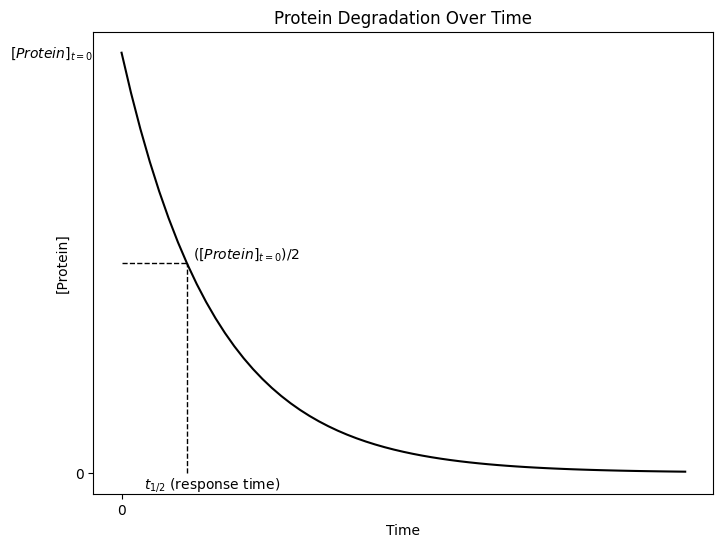

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
Protein_0 = 1
k_ploss = 1
time = np.arange(0, 6.1, 0.1)  # Time range
Protein_t = Protein_0 * np.exp(-k_ploss * time)
t_half = np.log(2) / k_ploss  # Time when concentration is half

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(time, Protein_t, label="Protein degradation", color='black')

plt.hlines(y=Protein_0/2, xmin=0, xmax=t_half, color='black', linestyle='--', linewidth=1)
plt.vlines(x=t_half, ymin=0, ymax=Protein_0/2, color='black', linestyle='--', linewidth=1)

# Annotations
plt.text(t_half+1, -0.05, '$t_{1/2}$ (response time)', va='bottom', ha='right', fontsize=10)
plt.text(-0.3, 1, f'$[Protein]_{{t=0}}$', va='center', ha='right', fontsize=10)

plt.text(t_half+1.2, Protein_0/2, '$([Protein]_{t=0})/2$', va='bottom', ha='right', fontsize=10)

# Remove ticks and grid
plt.xticks([0])  # Remove x-axis labels
plt.yticks([0])  # Remove y-axis labels
plt.grid(False)  # Turn off grid

# Labels and Title
plt.xlabel('Time')
plt.ylabel('[Protein]')
plt.title('Protein Degradation Over Time')

plt.show()


> **Figure 3.5. Removing the activator immediately inhibits transcription of our
circuit, causing the protein concentration to decay over time.** By assuming a
solution with an exponential form, we can monitor the protein concentration at any given point in an experiment. The response time of the system occurs when the initial protein concentration has been halved.

## **Section 3.7. Solving the system without feedback: addition of activator**

Now let’s consider the case in which there is no gene expression and the activator is
added such that gene translation suddenly occurs at its maximal rate ktrl,max. In this case
$[Protein]_{t=0} = 0$, and the steady-state solution is:

> <h3> $\frac{d[Protein]}{dt} = 0 = k_{trl,max} − k_{ploss}[Protein]_{ss}$

*(Equation 3.23)*

> <h3> $[Protein]_{ss} = \frac{k_{trl,max}}{kploss}$

*(Equation 3.24)*

I won’t derive the full analytical solution here, but it is common enough to find in an
integral table; the solution is:

> $[Protein](t) = [Protein]_{ss}(1− e^{-k_{ploss}t})$

*(Equation 3.25)*


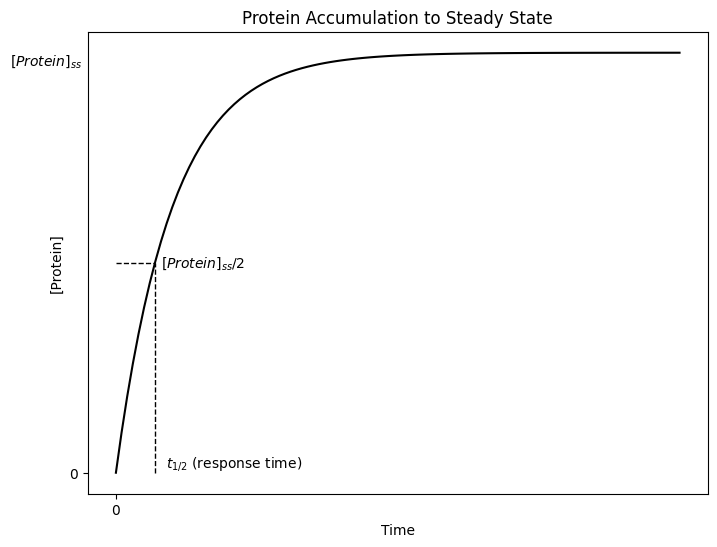

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
Protein_ss = 1  # Steady state value of the protein concentration
k_gain = 1      # Rate constant for the protein gain
time = np.arange(0, 10.1, 0.1)  # Extending time to see the approach towards steady state
Protein_t = Protein_ss * (1 - np.exp(-k_gain * time))

# Finding time to reach half the steady state
t_half = -np.log(0.5) / k_gain

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(time, Protein_t, label="Protein accumulation", color='black')

plt.hlines(y=Protein_ss/2, xmin=0, xmax=t_half, color='black', linestyle='--', linewidth=1)
plt.vlines(x=t_half, ymin=0, ymax=Protein_ss/2, color='black', linestyle='--', linewidth=1)

# Annotations
plt.text(t_half + 0.2, 0, '$t_{1/2}$ (response time)', va='bottom', ha='left', fontsize=10)
plt.text(t_half + 1.6, Protein_ss/2, f'$[Protein]_{{ss}}/2$', va='center', ha='right', fontsize=10)
plt.text(-0.6, Protein_ss, '$[Protein]_{ss}$', va='top', ha='right', fontsize=10)

# Remove ticks and grid
plt.xticks([0])  # Remove x-axis labels
plt.yticks([0])  # Remove y-axis labels
plt.grid(False)  # Turn off grid

# Labels and Title
plt.xlabel('Time')
plt.ylabel('[Protein]')
plt.title('Protein Accumulation to Steady State')

plt.show()


> **Figure 3.6. Dynamics of our system when addition of activator immediately
drives translation to its maximal rate.** Notice that the response time of this
system is the same as the response time of the system in Figure 3.5.

Once again, you see an exponential component as the protein concentration rises to its
steady-state value (Figure 3.6). Notice also that the steady-state solution of the system
when activator is removed is equal to the initial condition of the system when activator is
suddenly added, and vice versa.

With Equation 3.25 you can also determine the response time of the activation of gene
expression:

> <h3> $[Protein] (t_{1/2} ) = [Protein]_{ss} (1− e^{−k_{ploss}t_{1/2}})
= \frac{[Protein]_{ss}}{2}$

*(Equation 3.26)*

Interestingly, the response time is the same as calculated in Equation 3.22:

> <h3> $ t_{1/2} = \frac{ln(2)}{k_{ploss}}$

*(Equation 3.27)*

What does this mean? Recall that $k_{ploss}$ is a combination of two terms, a dilution term and a decay term, and the dilution term is dominant. The dilution term is related to the observation that every cell division reduces the protein concentration in each daughter cell by half. In other words, the time it takes to divide the protein concentration in half is the time it takes for one cell to divide. Therefore, $t_{1/2}$ is simply the doubling time of the
bacterium, and because doubling time is related to growth rate by:

> <h3> $ \text{doubling time} = \frac{ln(2)}{\text{growth rate}}$

*(Equation 3.28)*

$k_{ploss}$ is roughly equal to the growth rate.

![Figure 3.7](https://drive.google.com/uc?export=view&id=1OSJ7494IU7vrMzRstB1h8hbQLi1CKDpC)

> **Figure 3.7. Experimental measurement of protein (repressor) concentration over time following sudden induction of a system without feedback (Figure 3.1A).** *E. coli* cells were grown in batch culture and periodically monitored for GFP fluorescence, which served as a proxy for protein concentration. The experimental measurements (heavy and light black lines) are in reasonable agreement with the concentrations predicted (red line) by the set of ODEs. Note that the normalized protein concentration is halved after one cell cycle, as predicted by Equations 3.27 and 3.28. Modified from Rosenfeld, N., Elowitz, M.
B., Alon, U. Negative autoregulation speeds the response times of transcription networks. Journal of Molecular Biology. 2002. 323(5): 785-93, with permission from Elsevier.

## **Section 3.8. Comparison of modeling to experimental measurements**

Now let’s look at some experimental measurements. Figure 3.7 shows the results of an experiment using the genetic construct in Figure 3.1A, where the system is suddenly induced from a state of no gene expression. You can see that the theory and experiment agree nicely.

Let’s review what we’ve learned so far in this chapter. We focused on a construct without any feedback (Figure 3.1A) for which the input functions and rates are relatively simple. We discussed some critical assumptions, mass action kinetics, and relating time scales to each other. We can actually say some very interesting things based on this analysis. We examined the response time as well as the steady states. We also worked on building intuition – if you know a steady state and you know how quickly something responds, you can sketch a simple model on the back of an envelope.

## **Section 3.9. Addition of autoregulatory feedback**

Now let’s see what happens when we add autoregulatory feedback, using the system in Figure 3.1B as our example. We’ll apply some of the same steps we learned before to determine why autoregulatory feedback loops are so common in *E. coli’s* transcriptional regulatory network.

The key challenge in this case will be to determine $fxn_{trs}$ and its dependence on the protein concentration. To begin thinking about this, look at Figure 3.8’s depiction of the interaction between the protein and the operator region. Free protein binds to free DNA to form a complex, which can also dissociate to release protein and free DNA. The association and dissociation processes both have kinetic constants associated with them.

## <u>**Practice Problem 3.2**</u>

Given the system in Figure 3.8, write an ODE that represents the concentration of bound DNA over time. State any assumptions that you make. How is the bound DNA concentration related to the free DNA concentration under steady-state conditions?

![Figure 3.8](https://drive.google.com/uc?export=view&id=1bIOZrnI1FklSaNQRMDy5-s6uRGe-IcH2)

> **Figure 3.8. The dynamics of binding of a transcription factor (protein) to free DNA include association (ka) and dissociation (kd) kinetics.**

**Solution:** Bound DNA is produced by association of free protein and DNA and lost by dissociation of the protein-DNA complex. Your initial equation will therefore look something like:

> <h3> $\frac{d[DNA_{bound}]}{dt} = Rate_{association} − Rate_{dissociation}$

*(Equation 3.29)*

To further specify the rates, assume that association and dissociation follow mass action kinetics:

> <h3> $\frac{d[DNA_{bound}]}{dt} = k_a[Protein][DNA_{free}] − k_d[DNA_{bound}]$

*(Equation 3.30)*

At steady state:

> <h3> $\frac{d[DNA_{bound}]}{dt} = 0 = k_a[Protein][DNA_{free}] − k_d[DNA_{bound}]$

*(Equation 3.31)*


Rearranging, we find that:

> <h3> $[DNA_{bound}]_{ss} = \frac{k_a}{k_d}[Protein][DNA_{free}]_{ss}$

*(Equation 3.32)*

If we define **equilibrium** dissociation constant $K = k_d/k_a$, we can simpllify the expression to:

> <h3> $[DNA_{bound}]_{ss} = \frac{[Protein]}{K}[DNA_{free}]_{ss}$

*(Equation 3.33)*

Now we have a relationship between the concentrations of free and bound DNA that
depends on the protein concentration and the binding affinity between the protein and
DNA. A strong affinity means that DNA and protein are very likely to associate and not
let go of each other; K is therefore small, because ka >> kd. Similarly, a weak affinity
leads to a high K.

We are after something a little different, however – we’d like to know how much of the
total DNA is active and can be transcribed into mRNA. Our transcription factor (TetR) is
a repressor, and so the free DNA is the active DNA. What is the ratio of free DNA to
total DNA? Here another conservation equation can be useful. We assume that the total
amount of DNA is constant and that the DNA can only exist as free or bound. Then we
can write:

> <h3> $[DNA_{total}] = [DNA_{bound}] + [DNA_{free}]$

*(Equation 3.34)*

Equation 3.34 is valid at any point in time, including at steady state. We can therefore
substitute Equation 3.33 into Equation 3.34 to obtain:

> <h3> $[DNA_{total}] = \frac{[Protein]}{K}[DNA_{free}]_{ss}+[DNA_{free}]_{ss}$

*(Equation 3.35)*

Simplifying yields:

> <h3> $\frac{[DNA_{free}]_{ss}}{[DNA_{total}]} = \frac{1}{1 + \frac{[Protein]}{K}}$

*(Equation 3.36)*

Take a minute to understand what this equation means, using Figure 3.9 as a guide. If there is no protein available to bind DNA ($[Protein] = 0$), then the concentration of free DNA is equal to the total amount of DNA because all DNA is free. If the protein concentration is very high such that $[Protein] >> K$, then the ratio of free DNA to total DNA is approximately zero, and virtually all DNA is bound. If the protein concentration is equal to $K$, then half of the DNA is free and the other half is bound. In other words, the fraction of active DNA is completely, and in this case negatively, dependent on the
protein concentration for this system.

![Figure 3.9](https://drive.google.com/uc?export=view&id=1P1rfhZAnt_MD6VUbnuGfjXVzhqT4pH_J)

> **Figure 3.9. The fraction of free DNA is determined by the amount of protein
available to bind the DNA.** Note the definition of K, the binding constant, which represents the protein concentration at which half the DNA in the system is bound by protein.

With the fraction of active DNA determined as a function of the protein concentration, we can identify a strategy for defining $fxn_{trl}$. Specifically, we can assume that the ratio of protein production to the maximum production rate is equal to the fraction of active DNA to the total amount of DNA:

> <h3> $fxn_{trl} = k_{trl,max} \frac{[DNA_{free}]_{ss}}{[DNA_{total}]}$

*(Equation 3.37)*

Therefore:

> <h3> $fxn_{trl} = k_{trl,max} \frac{1}{1 + \frac{[Protein]}{K}}$

*(Equation 3.38)*

and our ODE now looks like this:

> <h3> $\frac{d[Protein]}{dt} = \frac{k_{trl,max}}{1+[Protein]/ K} − k_{ploss}[Protein]$

*(Equation 3.39)*

Notice that the linear, mass action assumption-based approach to modeling protein-DNA binding led to a more complicated and nonlinear term for protein production in Equation 3.39.

## **Section 3.10. Comparison of the regulated and unregulated systems**

Now that the ODE is defined, let’s compare this system (Figure 3.1B) to the one without feedback (Figure 3.1A). To do this, we will find the steady-state solution, the response curve for a sudden activation of gene expression (the step response), and the response time $t_{1/2}$.

The steady-state solution is determined as before, setting $d[Protein]/dt = 0$ and then solving for $[Protein]_{ss}$. In this case we end up with a quadratic equation:

> <h3> $\frac{k_{ploss}}{K}{[Protein]^2}_{ss} + k_{ploss}[Protein]_{ss} - k_{trl,max} = 0$

*(Equation 3.40)*

which we simplify by multiplying both sides of the equation by $K/k_{ploss}$, and then obtain the solution:

> <h3> $[Protein]_{ss} = \frac{-K + \sqrt{K^2 + 4\frac{Kk_{trl,max}}{k_{ploss}}}}{2}$

*(Equation 3.41)*

We can simplify Equation 3.41 with one more assumption: very strong autorepression.
As mentioned above, this scenario means that $k_a >> k_d; K$ is very small and can be
neglected with respect to other terms. Applying this assumption, both inside and outside
of the radical, and dividing both the numerator and denominator by 2 yields:

> <h3> $[Protein]_{ss} = \sqrt{\frac{K k_{trl,max}}{k_{ploss}}}$

*(Equation 3.42)*

Recall from Equation 3.24 that the system without feedback had a steady-state protein
concentration equal to $k_{trl,max}/k_{ploss}$. Given that the value of $K$ is expected to be very
small, you would expect that $[Protein]_{ss}$ is significantly smaller with feedback than
without. Indeed, Rosenfeld and colleagues (who carried out the experimentation with
these circuits) calculated the steady-state protein concentration using these equations and
determined approximate parameter values for bacterial repressors from the literature,
estimating a steady-state protein concentration of ~4000 proteins per cell in the case of no
autoregulation and ~200 proteins per cell with autoregulation – a 20-fold difference!


In order to find the response time, we’ll have to integrate Equation 3.39. You can refer to
an integral table if you’d like proof, but the solution is:

> <h3> $t([Protein]) - t([Protein]_0) = -\frac{1}{2k_{ploss}}[ln(([Protein - [Protein]_{ss})([Protein] + K + [Protein]_{ss}) + \frac{K}{K + 2[Protein]_{ss}}ln(\frac{[Preotin] - [Protein]_{ss}}{[Protein]+K+[Protien]_{ss}})] {|^{[Protein]}_{[Protein]_0}}$

*(Equation 3.43)*

We can make a few assumptions to simplify this expression. For example, let’s say that
the starting time and protein concentration ([Protein]0) are both equal to 0. As before, we
also assume strong autorepression, and therefore that K is very small compared to the
other terms. These assumptions enable us to reduce Equation 3.43 to:

> <h3> $t([Protein]) = -\frac{1}{2k_{ploss}}ln(\frac{{[Protein]^2}_{ss} - [Protein]^2}{{[Protein]^2}_{ss}})$

*(Equation 3.44)*


Solving for the ratio of protein concentration to steady-state protein concentration:

> <h3> $\frac{[Protein]}{[Protein]_{ss}} = \sqrt{1-e^{-2k_{ploss}t}}$

*(Equation 3.45)*


## <u>**Practice Problem 3.3**</u>

*Determine the response time, t1/2, for the autoregulated system in Figure 3.1B.*

**Solution:** We determine the response time with Equation 3.45 by setting the protein
concentration equal to one half of its steady-state value. Substitution yields:

> <h3> $\frac{1}{2} = \sqrt{1-e^{-2k_{ploss}t_{1/2}}}$

*(Equation 3.46)*

and by rearranging and solving we obtain:

> <h3> $t_{1/2} = \frac{ln(4/3)}{2k_{ploss}}$

*(Equation 3.47)*

Now that we have investigated the unregulated and autoregulated systems, we can
compare some of the key features. Figure 3.10 compares protein concentration with
respect to the steady-state protein concentration over time (the perturbation response or step response), the steady-state protein concentration, and the response time for the unregulated and strongly autoregulated models. The results in each case appear similar, but the perturbation response leads to a somewhat shorter response time – about a five-fold difference if you work out the math. The steady-state protein level is also lower, as we discussed earlier.

![Figure 3.10](https://drive.google.com/uc?export=view&id=1jDMq_8sx8SSv_uf7KSc4hs52WCmakSam)

> **Figure 3.10. Comparison of the key features of gene circuits without and with
strong negative autoregulation.** The circuits from Figure 3.1 appear similar, but the
feedback system has a lower steady-state protein concentration as well as a shorter
response time to perturbation.

The incorporation of autoregulation thus leads to a lower steady-state protein level and a
faster response to perturbation such that the steady state is reached more quickly. In
other words, feedback makes the circuit more responsive and efficient. In contrast, the
circuit without feedback will either be producing more protein than is necessary or will be taking a relatively long time to respond to perturbations.

![Figure 3.11](https://drive.google.com/uc?export=view&id=1zq6LEaF0xWkQTYC4B9AepAiiBcXHt-T3)

> **Figure 3.11. Experimental measurement of protein (repressor) concentration over
time following sudden induction of systems without or with strong negative autoregulation.** ODEs were used to predict the normalized protein concentrations for
the system without feedback and the system with feedback (red lines). Experimental
measurements are depicted with black and grey lines. Modified from Rosenfeld, N.,
Elowitz, M. B., Alon, U. Negative autoregulation speeds the response times of
transcription networks. *Journal of Molecular Biology.* 2002. **323**(5): 785-93, with
permission from Elsevier.

Are these predicted differences actually borne out in the laboratory? The answer turns
out to be yes. We’ve already discussed how the steady-state protein levels are
significantly lower in autoregulated circuits than in unregulated circuits. The same team
of experimentalists measured the response times of both circuits in Figure 3.1; their
results appear in Figure 3.11, which is similar to Figure 3.7. First, note that the y-axis isscaled for comparative purposes – we expect the two circuits to have different steady state values, but they have been normalized. The experimental data are shown near the theoretical predictions, and indeed the response time is significantly shorter in the autoregulated circuit.

Now we’ve looked at two very different methods of approaching the same problem –
autoregulatory negative feedback in transcriptional regulation – and I think you’ll agree that the methods are quite different! Hopefully you’ve seen that these tools contribute several elements that we could not have deduced with our Boolean modeling. For example, we could not have calculated and compared response times and steady states. ODEs are a powerful tool in your systems biology toolkit.

By covering the analytical solution of ODEs in this chapter, I’ve also been trying to help
you build more biological and computational intuition. Biologically, we unraveled
another layer of the feedback scenario to gain further insight about the role that feedback
plays in transcription, and as you’ll see later, in other systems as well.

Computationally, I hope you saw how powerfully certain assumptions enabled us to
create and solve these equations. The key assumptions were conservation of mass, mass
action kinetics, strong affinity binding, and steady-state conditions, and they are going to
show up again and again throughout this text. The next chapter will focus even more on
intuition and back-of-the-envelope calculation using graphical approaches to solve ODEs.

## **Chapter Summary**

The most common approach for describing models of biological systems is to write a set
of ODEs. A convenient way to conceptualize ODEs is to draw a compartment model
diagram, which shows the variables as blocks; the processes that change the variable
values are given as arrows pointing toward or away from the blocks. Once the variables
and processes have been identified, the processes must be specified in more detail. Three common assumptions that can aid in specification are:


1.   The rate at which the process occurs is very small compared to other processes,
and therefore can be neglected;
2.   The rate at which the process occurs is constant, and does not change based on
any other variable or rate;
3.   The rate at which the process occurs follows mass action kinetics, meaning that
the rate is proportional to the product of the concentrations of the reactants.

Only relatively small and uncomplicated sets of ODEs can be solved analytically, but the
analytical solution can give you important insights into how a system works. For this
reason, it is often worth the effort to simplify your model, as we demonstrated by
reducing our two-equation model to a single equation, in order to build intuition. This
simplification depended on a further common assumption, based on the consideration of
time scales: we assumed that one of our variables reached a steady state faster than the other variable. This assumption enabled us to solve for that steady-state value and
substitute into the other equation.


In keeping with our focus on negative autoregulation in gene expression, we considered a pair of complementary synthetic gene circuits with one difference: one is negatively autoregulated, and the other is not. The analytical approach enabled us to derive the properties of the two circuits, including the response time, the step response, and the steady-state expression level. We found that the step responses were related, but different; in the autoregulated circuit, the response time was significantly shorter and the steady-state protein level was lower than in the non-autoregulated circuit. This observation suggests that autoregulation enables cells to respond quickly to changes in
their environment by tuning the expression of a smaller number of proteins. Finally, we
showed that our theoretical analysis matched well with reported experimental
measurements.


In summary, analytical solutions of ODEs add another layer of dynamical information
and complexity to our modeling toolkit. We can’t see all of the possible solutions at
once, as we did with Boolean models. Nevertheless, the gain in our ability to make
quantitative predictions by using ODEs often outweighs this drawback. Moreover,
techniques exist to simultaneously visualize multiple ODE systems, as you will see in the
next chapter.

## **Recommended Reading**

*   Alon, U. An Introduction to Systems Biology:

*   Design Principles of Biological Circuits.
Chapman & Hall/CRC, 2007.

*   Bolouri, H. Computational Modeling of Gene Regulatory Networks – A Primer.
Imperial College Press, 2008.

*   Rosenfeld, N., Elowitz, M. B., Alon, U. Negative autoregulation speeds the response
times of transcription networks. Journal of Molecular Biology. 2002. 323(5): 785-93.

*   Strang, G. Linear algebra and its applications, Fourth Edition. Brooks Cole, 2005.

## **Problems**

###**Problem 3.1: Cell Growth**


Cells growing in a nutrient-rich environment (such as *E. coli* growing in a flask full of
rich broth) are observed to grow exponentially; their growth can be represented as:

> $\frac{dX}{dt} = μX$

where $X$ is the cellular biomass concentration and $μ$ is the growth rate.

**(a)** Write the analytical solution of the growth equation, assuming an initial cellular
biomass concentration of $X_0$.

**(b)** Determine the relationship between the growth rate and the doubling time: the
time at which $X(t) = 2X_0$. Relate this relationship to the concept of response time
that you read about in this chapter.

**(c)** Now, imagine that you are growing cells in a flask and measuring the
concentration of cells over time. From your measurements, you determine a
growth rate that you call $μ_{flask}$. However, when you watch these cells growing
under a microscope, you notice that some of the cells lyse and die at a rate
proportional to the biomass concentration, with rate constant kdeath. How would
you change the ODE in your cell growth model to account for the death of cells
over time?

**(d)** Write the analytical solution of the ODE in **(c)**.

**(e)** What condition is required for this system to reach steady state?

**(f)** Going back to your microscope, you decide to measure the growth rate of
individual cells by recording the time between cell-division events in a single cell.
Based on your model from **(c)**, how would you expect your new single-cell
measurements to compare to the growth rate that you measured in **(a)**?

### **Problem 3.2. Negative autoregulation**

In this problem, we will focus on the same circuits we discussed in the chapter, but with
more detail.

First, we consider the system without autoregulation.

![Figure 3.2.1](https://drive.google.com/uc?export=view&id=1RJoAzr9h5SyoZfpXatguDsuoKWprW4nN)

**(a)** Derive a single ODE for the change in protein concentration over time, given rate
constants for the rates of mRNA and protein loss $(k_{mloss}$ and $k_{ploss})$, translation
($k_{trl}$), and maximum transcription ($k_{trs,max}$). List the assumptions that were
required to derive this equation.

**(b)** Using the equation from **(a)**, calculate $k_{ploss}$ and the steady-state protein concentration in both μM and the number of proteins per cell. You may assume
that $[Protein]_{(t=0)} = 0 μM$, and that transcription is suddenly induced by the
addition of an activator. You will also need the following constants:

*   Division time of a cell = 35 min

*   $k_{trl,max}$ (maximum protein production rate) = 0.0015 μM/s

*   1 μM protein concentration ≈ 1,000 protein molecules/cell

**(c)** Write the analytical solution of the equation you derived in **(a)**, and generate a
graph of the change in protein concentration over time, based on this equation and
the above constants.

**(d)** Now use the MATLAB ODE solver `ode45` to plot the numerical solution to the
ODE (type `help ode45` in the command line in MATLAB or refer to the Appendix in this book). How does this plot compare to your solution to **(c)**?

We consider now the case of negative autoregulation.


![Figure 3.2.2](https://drive.google.com/uc?export=view&id=1fcy8yBJng2uM1HDPr0SiSSqofuEHnMf7)

Here, the protein can bind to the operator, and transcription only occurs in the absence of
protein binding. As before, K is the ratio of the rate of protein dissociation from the
operator to the rate of protein association with the operator, and the rate of protein
production is:

> <h3> $\frac{k_{trl, max}}{(1+\frac{[Protein]}{K})}$

**(e)** Calculate the steady-state protein concentration (in μM and proteins/cell) and the
response time of the system. Be careful with units. The value for K is 15 nM.

**(f)** Plot the changes in protein concentration with time using ode45. Again, the
initial protein concentration is zero. Put this plot on the same axes as your output
for **(c)**.

**(g)** Compare the values and plots from **(e)** and **(f)** to those for the case without
regulation in **(b)** and **(c)**. Comment briefly on the possible advantages of this
difference in behavior in biological terms.

### **Problem 3.3. Positive Autoregulation**

In Problem 2.1, we considered an autoregulatory loop with positive, instead of negative, feedback. We now consider this circuit in more detail using ODEs.


![Figure 3.3.1](https://drive.google.com/uc?export=view&id=1jrT9EeHvs1feqNAn-6t3Y67lVtalR1E9)

Above and on the right is a diagram of the binding between the protein and free DNA
($DNA_{free}$) to form a complex, $DNA_{bound}$ (you have already seen this diagram in Figure
3.8). In this case, only the bound DNA can be transcribed.

**(a)** Write an ODE for the change in $DNA_{free}$ over time in terms of $DNA_{free}$, $DNA_{bound}$,
and $Protein$, together with the association and dissociation rate constants ka and
kd.

**(b)** What assumption did you make to write the equation in (a)? Give an example of
a case for which this assumption does not hold.

**(c)** Use your answer from (a) to derive an expression for the ratio of $[DNA_{bound}]$ to
$[DNA_{total}]$. Your answer should be in terms of $Protein$ and $K$, where $K = k_d/k_a$.

**(d)** Use your answer to (c) together with Equation 3.17 to write a single ODE that
describes the change in protein concentration over time.

**(e)** Write an equation for the steady-state protein concentration in terms of $K$, $k_{ploss}$, and $k_{trs,max}$. How does this new equation compare to the equations for the system
with no regulation?

**(f)** Using MATLAB, plot a graph of the dynamics for (i) the equation you used in
(d), with $k_{trl,max}$ = 0.0008 μM/s, $k_{ploss}$ = 0.0001925/s, and $K$ = 0.010 μM; (ii) the same as in (i), but with $K$ = 1 μM; and (iii) the system without positive regulation.

Plot them all on the same graph for 0-5 h. How do the three compare?

Note that for (iii) you can use the initial conditions $t = 0$ h and $[Protein] = 0$ μM,
but for (i) and (ii), you will prefer initial conditions such as t = 0 h and $[Protein] =
0.1$ μM. Why?

### **Problem 3.4. Negative autoregulation with cooperativity**

A common variation on our negative autoregulatory circuit is that often, more than one binding site for the same protein occurs in the promoter region of the DNA. Therefore, more than one molecule of the same species can bind to the DNA and more strongly
repress expression. This phenomenon is known as **cooperativity**.

We will now analyze a negative autoregulatory circuit with cooperativity. In this case,
two proteins can bind to the DNA, and both must be bound to the DNA to repress
transcription.

![Figure 3.4.1](https://drive.google.com/uc?export=view&id=1kREX2cvVTH78xfMMM9dSsed2a3_zWZQE)

The reactions describing the interactions between DNA and protein are:

> $protein + \text{DNA}_{\text{free}} ⟺ \text{DNA}_{\text{bound to one protein}}$

*(with $k_a$ the rate forward, $k_d$ the rate reverse)*

> $protein + \text{DNA}_{\text{bound to one protein}} ⟺ \text{DNA}_{\text{free}}$

*(with $k_a$ the rate forward, $k_d$ the rate reverse)*

**(a)** From these reactions, derive an equation for $[DNA_{free}]$/$[DNA_{total}]$ in terms of protein concentration and $K$.

**(b)** The equation that you will see most often in the literature as the answer to (a)
looks like this:

> <h3> $\frac{[DNA_{free}]}{[DNA_{total}]} = \frac{1}{1 + {(\frac{[Protein]}{K})}^H}$

where $H$ is the **Hill Coefficient**, which expresses the amount of cooperativity in the
system. To obtain a solution in this form, you will need to cancel one term from
your solution. Where does this term come from? Explain why it is reasonable to cancel this term in biological terms.

**(c)** What is the value of $H$ for our system? What happens when H is equal to one?
What do you think higher values of $H$ correspond to?

**(d)** For $H = {1,2,3,4,5}$, plot the ratio $[DNA_{free}]$/$[DNA_{total}]$ vs. $[Protein]$, where $[Protein]$ varies from 0 to 0.05 μM. Let $K = 10$ nM. How do the curves change
as H increases? What does this change mean in biological terms? What implications could this change have for modeling a cooperative reaction?

**(e)** Substitute the form of your answer for (b) into Equation 3.17, and plot the changes in $[Protein]$ over time for this case of negative autoregulation and cooperativity. Initially the system contains no protein, and there is a sudden increase in $k_{trl,max}$ to 0.0008 μM/. The value for $k_{ploss}$ is 0.0001925/s. Use `ode45`. Show lines for $H = {1,2,3,4,5}$. How does the steady-state protein concentration change as $H$ increases? Explain this trend in terms of the biology of
the system.